# CIFAR-10

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import factorial as f
from time import sleep
import itertools
import time

In [ ]:
K = 8
N = 10
B = f(N+K-1) // f(K) // f(N-1)

# calculate H(B|Y=y), y is uniform
p_y = 0
P_ys = []
b_count = 0
H_y = 0

for c0 in range(0, N+K-1):
  for c1 in range(c0+1, N+K-1):
    for c2 in range(c1+1, N+K-1):
      for c3 in range(c2+1, N+K-1):
        for c4 in range(c3+1, N+K-1):
          for c5 in range(c4+1, N+K-1):
            for c6 in range(c5+1, N+K-1):
              for c7 in range(c6+1, N+K-1):
                b_count += 1
                Ns = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
                Ns[c0-0] += 1
                Ns[c1-1] += 1
                Ns[c2-2] += 1
                Ns[c3-3] += 1
                Ns[c4-4] += 1
                Ns[c5-5] += 1
                Ns[c6-6] += 1
                Ns[c7-7] += 1
                p_y = f(K) / (N**K) / (f(Ns[0])*f(Ns[1])*f(Ns[2])*f(Ns[3])*f(Ns[4])*f(Ns[5])*f(Ns[6])*f(Ns[7])*f(Ns[8])*f(Ns[9]))
                P_ys.append(p_y)
                H_y += -p_y * math.log2(p_y)

print(len(P_ys))
print(sum(P_ys))
print(b_count)
print('B', B)
print(math.log2(B))
print('H_y', H_y)
print(2**H_y)

24310
1.0000000000001252
24310
B 24310
14.569262272916092
H_y 13.860045564098357
14869.263443691536


In [ ]:
# calculate H(B|S=s)
U_range = np.arange(1, 6252, 1250)
# U_range = np.arange(1, B, 3000)
H_ss = np.zeros_like(U_range).astype(float)

for i, U in enumerate(U_range):
  H_s = 0
  p_s = 0
  choices = np.random.choice(B, U, p=P_ys)
  # print(len(choices), choices)
  for u in range(U):
    p_s = sum([1 for c in choices if c == u]) / U
    # print(p_s)
    if p_s != 0:
      H_s += -p_s * math.log2(p_s)
  print('U:', U, 'H_s:', H_s)
  H_ss[i] = H_s

print('H_ss', H_ss)

U: 1 H_s: 0
U: 1251 H_s: 0.19578959694642661
U: 2501 H_s: 0.527494304228384
U: 3751 H_s: 1.6176505965077759
U: 5001 H_s: 2.240630027446816
U: 6251 H_s: 3.09074958685801
H_ss [0.         0.1957896  0.5274943  1.6176506  2.24063003 3.09074959]


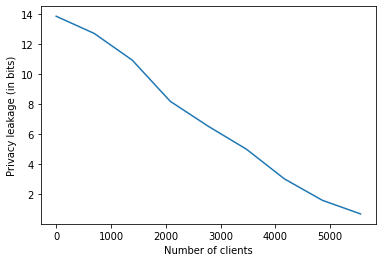

In [ ]:
H_ss = np.array([ 0.,          1.14445591,  2.92142532,  5.66463935,  7.32508148,  8.84656221, 10.8259317,  12.2532801,  13.15547667])
H_y = 13.860045564098357
plt.plot(np.arange(9)*6250/9, H_y-H_ss)
# H_ss = np.array([ 0., 0.1891638,  0.78579461, 1.54249295, 2.22972449, 3.19595329])
# H_y = 13.860045564098357
# plt.plot(np.arange(6)*6250/6, H_y-H_ss)
plt.xlabel('Number of clients')
plt.ylabel('Privacy leakage (in bits)')
plt.show()

# Fixed UK=50000

In [ ]:
UK = 50000  # 50000
N = 10

for K in [9]:  # [8]
  U = int(UK / K)
  B = f(N+K-1) // f(K) // f(N-1)
  print("K, U, B:", K, U, B)

  # calculate H(B|Y=y), y is uniform
  p_y = 0
  P_ys = []
  b_count = 0
  H_y = 0
  for comb in itertools.combinations(np.arange(N+K-1), N-1):
    b_count += 1
    p_y = f(K) / (N**K) / f(comb[0]) / f(N+K-2-comb[-1])
    for n in range(1, N-1):
      p_y = p_y / f(comb[n]-comb[n-1]-1)
    P_ys.append(p_y)
    H_y += -p_y * math.log2(p_y)

  # print('len(P_ys)', len(P_ys))
  # print('sum(P_ys)', sum(P_ys))
  # print('b_count', b_count)
  # print('B', B)
  # print('math.log2(B)', math.log2(B))
  print('H_y', H_y)
  # print('2**H_y', 2**H_y)

  # calculate H(B|S=s)
  H_s = 0
  p_s = 0
  choices = np.random.choice(B, U, p=P_ys)
  # print(len(choices), choices)
  start_time = time.time()
  for u in range(U):
    if u%10000==0:
      end_time = time.time()
      print('u:', u, '/', U, ', H_s:', H_s, ', time:', round((end_time-start_time)/60))
    p_s = sum([1 for c in choices if c == u]) / U
    # print(p_s)
    if p_s != 0:
      H_s += -p_s * math.log2(p_s)
  print('H_s', H_s)

K, U, B: 9 5555 48620
H_y 14.7084540600815
u: 0 / 5555 , H_s: 0 , time: 0
H_s 0.5174473607079045


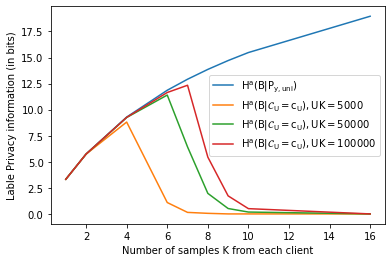

In [ ]:
Ks = [1, 2, 4, 6, 7, 8, 9, 10, 16]
Ks_H_y = [3.321928, 5.743856, 9.286393, 11.8602849, 12.91726, 13.860046, 14.708454, 15.4776598, 18.95812]
K_s_H_s_UK100000 = [3.321874, 5.74309, 9.25941, 11.64429, 12.33949, 5.448149, 1.7305256, 0.505497, 0]
K_s_H_s_UK50000 = [3.321928, 5.738995, 9.2478531, 11.399456, 6.4285309, 1.970087, 0.517447, 0.17900, 0]
K_s_H_s_UK5000 = [3.318592, 5.73230, 8.81008, 1.091727, 0.146047, 0.056241, 0, 0, 0]

# plt.plot(Ks, Ks_H_y, label='$\mathregular{H^a(B|Y=y_0)}$')
# plt.plot(Ks, K_s_H_s_UK5000, label='$\mathregular{H^a(B|S=s), UK=5000}$')
# plt.plot(Ks, K_s_H_s_UK50000, label='$\mathregular{H^a(B|S=s), UK=50000}$')
# plt.plot(Ks, K_s_H_s_UK100000, label='$\mathregular{H^a(B|S=s), UK=100000}$')
plt.plot(Ks, Ks_H_y, label='$\mathregular{H^a(B|P_{y,uni})}$')
plt.plot(Ks, K_s_H_s_UK5000, label='$\mathregular{H^a(B|\mathcal{C}_U=c_U), UK=5000}$')
plt.plot(Ks, K_s_H_s_UK50000, label='$\mathregular{H^a(B|\mathcal{C}_U=c_U), UK=50000}$')
plt.plot(Ks, K_s_H_s_UK100000, label='$\mathregular{H^a(B|\mathcal{C}_U=c_U), UK=100000}$')
plt.xlabel('Number of samples K from each client')
plt.ylabel('Lable Privacy information (in bits)')
plt.legend()
plt.show()

# Dry bean

In [ ]:
K = 4
N = 4
B = f(N+K-1) // f(K) // f(N-1)

In [ ]:
# calculate H(B|Y=y), y is uniform
p_y = 0
P_ys = []
b_count = 0
H_y = 0

for c0 in range(0, N+K-1):
  for c1 in range(c0+1, N+K-1):
    for c2 in range(c1+1, N+K-1):
      for c3 in range(c2+1, N+K-1):
          b_count += 1
          Ns = [0, 0, 0, 0, 0, 0]
          Ns[c0-0] += 1
          Ns[c1-1] += 1
          Ns[c2-2] += 1
          Ns[c3-3] += 1
          p_y = f(K) / (N**K) / (f(Ns[0])*f(Ns[1])*f(Ns[2])*f(Ns[3])*f(Ns[4])*f(Ns[5]))
          P_ys.append(p_y)
          H_y += -p_y * math.log2(p_y)

# print(sum(P_ys))
# print(b_count)
print('B', B)
print(math.log2(B))
print('H_y', H_y)
print(2**H_y)

B 35
5.129283016944966
H_y 4.81510800723783
28.150877863635262


In [ ]:
# calculate H(B|S=s)
U_range = np.arange(1, 1176, 110)
# U_range = np.arange(1, B, 3000)
H_ss = np.zeros_like(U_range).astype(float)

for i, U in enumerate(U_range):
  H_s = 0
  p_s = 0
  choices = np.random.choice(B, U, p=P_ys)
  # print(len(choices), choices)
  for u in range(U):
    p_s = sum([1 for c in choices if c == u]) / U
    # print(p_s)
    if p_s != 0:
      H_s += -p_s * math.log2(p_s)
  print(H_s)
  H_ss[i] = H_s

print('H_ss', H_ss)

0
4.488025774313082
4.702617634802406
4.802929804553897
4.750954940629122
4.744101917925756
4.8117979838104485
4.768437327163887
4.815896365695055
4.789852490143935
4.782352207555449
H_ss [0.         4.48802577 4.70261763 4.8029298  4.75095494 4.74410192
 4.81179798 4.76843733 4.81589637 4.78985249 4.78235221]


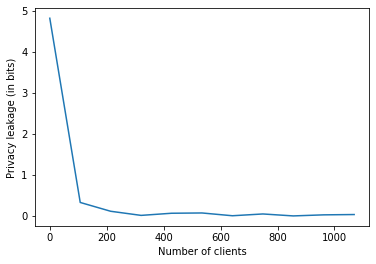

In [ ]:
H_ss = np.array([0., 4.48802577, 4.70261763, 4.8029298, 4.75095494, 4.74410192, 4.81179798, 4.76843733, 4.81589637, 4.78985249, 4.78235221])
H_y = 4.81510800723783
plt.plot(np.arange(11)*1176/11, H_y-H_ss)
plt.xlabel('Number of clients')
plt.ylabel('Privacy leakage (in bits)')
plt.show()